# Анализ сообщества социальной сети ВКонтакте


Цель - выяснить потенциальную целевую аудиторию для показа таргетинговой рекламы.
Сообщество - ежедневно обновляющийся каталог с фотографиями животных. 
Ссылка: https://vk.com/kotiki_kartinki_foto 
* Количество людей, состоящих в группе, на момент анализа - 1047 (goodUsers.txt).
* Количество людей, не состоящих в группе, но проявшивших в группе какую-либо активность (репост записи, лайк) - 3285 (badUsers.txt)


Все данные были собраны при помощи VK API.

Необходимо "предсказать" последнее поле (является ли пользователь подписчиком сообщества) для новых пользователей
## Атрибуты:
- Пол
- Количество друзей
- Общее число записей на стене человека
- Среднее количество публикаций записей за неделю
- Количество других сообществ, в которых состоит человек
- Род деятельности (работает, получает среднее образование, получает высшее образование)
- Семейное положение пользователя (1 — не женат/не замужем; 2 — есть друг/есть подруга; 3 — помолвлен/помолвлена; 4 — женат/замужем; 5 — всё сложно; 6 — в активном поиске; 7 — влюблён/влюблена; 8 — в гражданском браке; 0 — не указано. 0 - не указано)
- Отношение к алкоголю (1 — резко негативное; 2 — негативное; 3 — компромиссное; 4 — нейтральное; 5 — положительное. 0 - не указано)
- Отношение к курению (1 — резко негативное; 2 — негативное; 3 — компромиссное; 4 — нейтральное; 5 — положительное. 0 - не указано)
- Главное в жизни (1 — семья и дети; 2 — карьера и деньги; 3 — развлечения и отдых; 4 — наука и исследования; 5 — совершенствование мира; 6 — саморазвитие; 7 — красота и искусство; 8 — слава и влияние; 0 - не указано)
- Главное в людях (1 — ум и креативность; 2 — доброта и честность; 3 — красота и здоровье; 4 — власть и богатство; 5 — смелость и упорство; 6 — юмор и жизнелюбие.0 - не указано)
- Политические взгляды (1 — коммунистические; 2 — социалистические; 3 — умеренные; 4 — либеральные; 5 — консервативные; 6 — монархические; 7 — ультраконсервативные; 8 — индифферентные; 9 — либертарианские. 0 - не указано)
- Количество подписчиков пользователя
- Является ли пользователем подписчиком сообщества (1 - является, 0 - не является)






In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Загрузка данных, проверка размеров и вывод начальных значений

In [109]:
goodUserData = pd.read_csv('goodUsersData.txt', sep = ',', engine = 'python')

In [110]:
badUserData = pd.read_csv('badUsersData.txt', sep = ',', engine = 'python')

In [111]:
print("goodUserData size: ", goodUserData.shape)
print("badUserData size: ", badUserData.shape)

goodUserData size:  (1047, 15)
badUserData size:  (3285, 15)


In [112]:
goodUserData.head()

,sex,age,friends,postsOnTheWall,weeklyPostActivity,pages,occupation,relation,alcohol,smoking,lifeMain,peopleMain,political,followers,goodUser
0,1,0,763,1359,0.666414,105,work,0,0,0,0,0,0,305,1
1,1,0,49,2539,0.693444,213,work,0,0,0,5,5,0,2,1
2,1,0,86,723,0.332636,27,university,0,0,0,0,0,0,49,1
3,2,0,2707,3188,0.849384,148,work,0,0,0,0,0,0,1153,1
4,1,0,222,917,0.261649,17,university,0,0,0,0,0,0,64,1


In [113]:
badUserData.head()

,sex,age,friends,postsOnTheWall,weeklyPostActivity,pages,occupation,relation,alcohol,smoking,lifeMain,peopleMain,political,followers,goodUser
0,1,0,103,153,0.430277,18,school,0,0,0,0,0,0,18,0
1,2,31,197,258,0.375721,44,work,0,0,0,0,0,0,266,0
2,2,19,95,178,0.143849,31,unknown,0,0,0,0,0,0,49,0
3,1,0,39,6014,6.067103,13,unknown,0,0,0,0,0,0,10,0
4,1,16,99,116,0.205250,146,work,0,0,0,0,0,0,134,0


Так как данные поступили из двух источников, выполняется объединение двух dataframes в один

In [114]:
data = pd.merge(badUserData, goodUserData, how = 'outer', on = ['sex', 'age', 'friends', 'postsOnTheWall', 'weeklyPostActivity', 'pages', 'occupation', 'relation', 'alcohol', 'smoking', 'lifeMain', 'peopleMain', 'political', 'followers', 'goodUser'])

In [115]:
data.shape
data

,sex,age,friends,postsOnTheWall,weeklyPostActivity,pages,occupation,relation,alcohol,smoking,lifeMain,peopleMain,political,followers,goodUser
0,1,0,103,153,0.430277,18,school,0,0,0,0,0,0,18,0
1,2,31,197,258,0.375721,44,work,0,0,0,0,0,0,266,0
2,2,19,95,178,0.143849,31,unknown,0,0,0,0,0,0,49,0
3,1,0,39,6014,6.067103,13,unknown,0,0,0,0,0,0,10,0
4,1,16,99,116,0.205250,146,work,0,0,0,0,0,0,134,0
5,1,0,135,542,0.563164,69,unknown,0,0,0,0,0,0,31,0
6,2,0,1051,1443,1.785624,60,unknown,0,0,0,0,0,0,114,0
7,1,0,53,689,0.304239,31,unknown,0,0,0,0,0,0,50,0
8,1,15,61,467,0.794732,60,unknown,0,0,0,0,0,0,14,0
9,1,0,114,15,0.040086,29,unknown,0,0,0,0,0,0,6,0


In [116]:
data.describe()

,sex,age,friends,postsOnTheWall,weeklyPostActivity,pages,relation,alcohol,smoking,lifeMain,peopleMain,political,followers,goodUser
count,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000
mean,1.185826,10.982225,182.091413,1685.193444,1.627724,142.088873,0.777470,0.249769,0.232687,0.312096,0.331717,0.237073,146.885272,0.241690
std,0.389605,18.697902,453.143174,6247.661936,5.206930,237.640519,1.836763,0.813723,0.777995,1.183669,1.085825,1.057079,1367.567017,0.428157
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,43.000000,33.000000,0.080012,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
50%,1.000000,0.000000,90.000000,227.000000,0.320774,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000
75%,1.000000,17.000000,175.000000,1034.000000,1.112438,156.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
max,2.000000,116.000000,9981.000000,127477.000000,89.807192,3241.000000,7.000000,5.000000,5.000000,8.000000,6.000000,9.000000,80032.000000,1.000000


Так как одним из важнейших атрибутов является возраст, то следует удалить все строки, у которых возраст не указан

In [117]:
data = data[data['age'] > 0]
data.shape

(1616, 15)

In [118]:
data.describe()

,sex,age,friends,postsOnTheWall,weeklyPostActivity,pages,relation,alcohol,smoking,lifeMain,peopleMain,political,followers,goodUser
count,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000
mean,1.227104,29.439975,201.545173,1912.144802,1.834722,152.985767,1.017327,0.314975,0.314356,0.412748,0.444307,0.323020,183.845916,0.248762
std,0.420565,19.845224,507.526449,6948.184031,5.713012,269.747953,2.058812,0.895354,0.904172,1.332076,1.255819,1.216854,2042.898917,0.432430
min,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.000000,47.000000,33.000000,0.084366,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
50%,1.000000,23.000000,100.500000,238.000000,0.352223,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000
75%,1.000000,35.000000,190.250000,1148.500000,1.212204,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.250000,0.000000
max,2.000000,116.000000,9981.000000,112405.000000,89.807192,3241.000000,7.000000,5.000000,5.000000,8.000000,6.000000,9.000000,80032.000000,1.000000


Следующий шаг - построение графиков

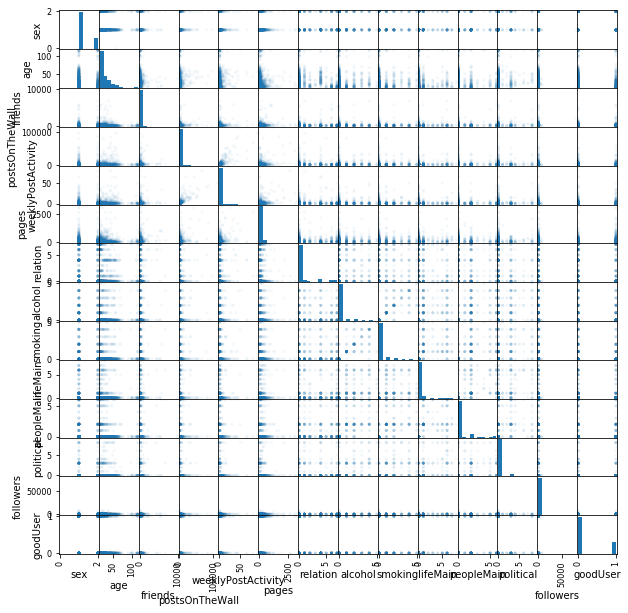

In [119]:
%matplotlib inline

from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(10, 10));
pass

Быстро пробежавшись взгядом по данным видно: 
- Девушек в сообществе намного больше, чем мужчин (поэтому есть смысл рассматривать только девушек); 
- Преобладает возраст участников до 18 лет (интересно, что, просматривая статистику группы средствами ВКонтакте, можно увидеть, что второй по популярности возраст в сообществе - это женщины старше 40 лет, но убрав все записи, где возраст не указан, было получено очень низкое количество людей старше 40. Все-таки, женщины скрывают свой возраст =);

После удаления строк без возраста осталось не так много "хороших" пользователей по сравнению с "плохими". Возможно, далее это повлияет на обучение 

Построим таблицу корреляций для величин. 

In [120]:
data.corr()

,sex,age,friends,postsOnTheWall,weeklyPostActivity,pages,relation,alcohol,smoking,lifeMain,peopleMain,political,followers,goodUser
sex,1.000000,0.038395,0.073474,0.055118,0.032388,-0.008038,0.085557,0.096038,0.105241,0.067998,0.077306,0.087661,-0.021712,-0.041864
age,0.038395,1.000000,0.003373,0.142309,0.114066,-0.051565,-0.002202,0.042133,0.024828,-0.009802,-0.021588,0.088418,-0.013254,-0.066372
friends,0.073474,0.003373,1.000000,0.091307,0.094215,0.163009,0.080375,0.048168,0.056106,0.071527,0.092951,0.135551,0.138466,0.049463
postsOnTheWall,0.055118,0.142309,0.091307,1.000000,0.801644,0.303504,0.054600,0.097123,0.088916,0.079087,0.046756,0.124979,0.005165,0.044461
weeklyPostActivity,0.032388,0.114066,0.094215,0.801644,1.000000,0.286521,0.076037,0.058784,0.044875,0.028018,0.052454,0.038311,-0.001206,0.045928
pages,-0.008038,-0.051565,0.163009,0.303504,0.286521,1.000000,0.053942,0.059554,0.059003,0.067744,0.062201,0.045733,0.037729,0.232034
relation,0.085557,-0.002202,0.080375,0.054600,0.076037,0.053942,1.000000,0.236874,0.264838,0.173949,0.294465,0.175717,-0.004850,0.020194
alcohol,0.096038,0.042133,0.048168,0.097123,0.058784,0.059554,0.236874,1.000000,0.871169,0.579340,0.719115,0.482837,0.006340,0.034192
smoking,0.105241,0.024828,0.056106,0.088916,0.044875,0.059003,0.264838,0.871169,1.000000,0.534830,0.711798,0.431036,0.007959,0.018416
lifeMain,0.067998,-0.009802,0.071527,0.079087,0.028018,0.067744,0.173949,0.579340,0.534830,1.000000,0.624303,0.489929,-0.001619,0.038779


В основном признаки слабо коррелируют между собой, но можно наблюдать высокую корреляцию между postsOnTheWall и weeklyPostActivity (0.8)

In [121]:
Рассмотрим некоторые графики подробнее

SyntaxError: invalid syntax (<ipython-input-121-5095243c7760>, line 1)

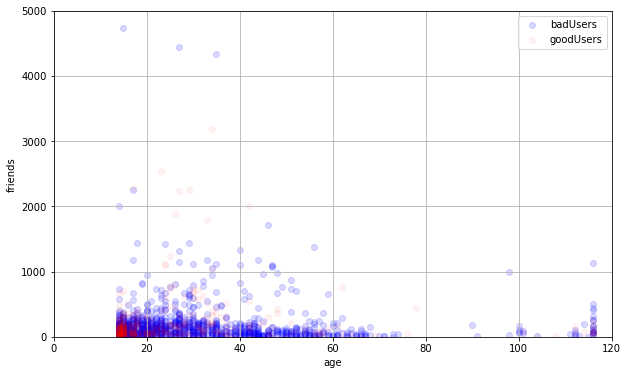

In [123]:
plt.figure(figsize = (10, 6))
#plt.plot(data['age'], data['friends'], 'o', alpha = 0.1)
#plt.xlabel('age')
#plt.ylabel('friends')
#pass

plt.scatter(data[data['goodUser'] == 0]['age'],
            data[data['goodUser'] == 0]['friends'],
            alpha = 0.15,
            label = 'badUsers',
            color = 'b')

plt.scatter(data[data['goodUser'] == 1]['age'],
            data[data['goodUser'] == 1]['friends'],
            alpha = 0.05,
            label = 'goodUsers',
            color = 'r')

plt.xlabel('age')
#plt.xticks(range(18))
plt.xlim(0, 120)
plt.ylim(0, 5000)
plt.ylabel('friends')
plt.legend()
plt.grid()
pass

Наибольшее количество друзей имеют люди от 20 до 35 лет. Логично предположить, что эти люди, как правило, закончили школу, ВУЗ, имеют работу. Именно поэтому у них широкий круг знакомых. 

Чуть меньше друзей имеют люди младше 20 лет. Категория "за 40" имеет мало друзей, скорее всего это связано с недавним появлению социальных сетей, и большинство таких людей можно считать "выпавшими" из социальных сетей.

Так же обнаружились люди с возрастом больше 100 лет - это довольно заметная группа. По собственному опыту автор может сказать, что это люди младше 18, ибо у него самого зачем-то было долгое время указан возраст в профиле 104 года...

Красным цветом указаны люди, вступвшие в сообщество.

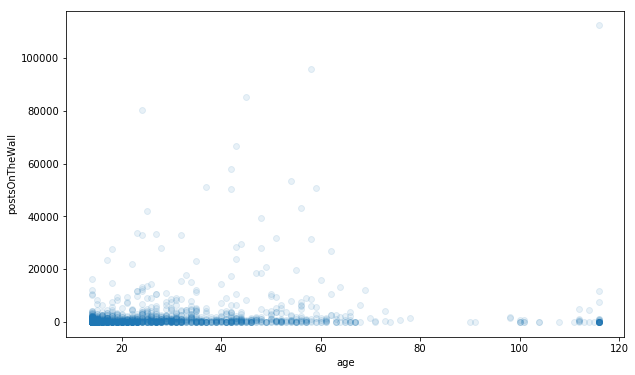

In [124]:
plt.figure(figsize = (10, 6))
plt.plot(data['age'], data['postsOnTheWall'], 'o', alpha = 0.1)
plt.xlabel('age')
plt.ylabel('postsOnTheWall')
pass

График возраста и общее количества записей на странице пользователя. Здесь, опять же, можно сделать вывод, что люди до 18 лет, еще не успели набрать большое количество записей на стене в отличие от категории 20-35 (напомню, что ВКонтакте существует чуть более 10 лет)

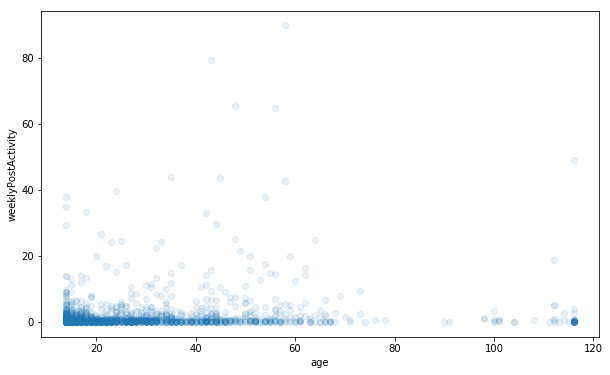

In [49]:
plt.figure(figsize = (10, 6))
plt.plot(data['age'], data['weeklyPostActivity'], 'o', alpha = 0.1)
plt.xlabel('age')
plt.ylabel('weeklyPostActivity')
pass

На этом графике видно, что среднее количество сообщений в неделю у людей до 18 лет наиболее высоко. Это ожидаемо. Дети имеют намного больше свободного времени, чтобы тратить его на социальные сети, и меньше сдерживающих психологиеских факторов, отвечающих за тематику постов.

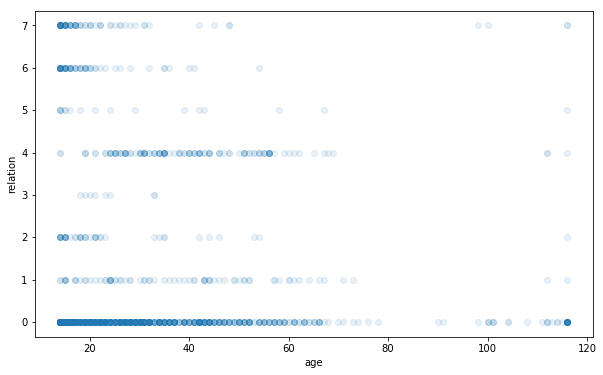

In [125]:
plt.figure(figsize = (10, 6))
plt.plot(data['age'], data['relation'], 'o', alpha = 0.1)
plt.xlabel('age')
plt.ylabel('relation')
pass

- 1 — не женат/не замужем; 
- 2 — есть друг/есть подруга; 
- 3 — помолвлен/помолвлена; 
- 4 — женат/замужем; 
- 5 — всё сложно; 
- 6 — в активном поиске; 
- 7 — влюблён/влюблена; 
- 8 — в гражданском браке; 
- 0 — не указано;

Большинство людей до 18 влюблены или находятся в активном поиске партнера. Это мило.
Так же можно выделить плотную группу женатых людей  ~ от 23 лет

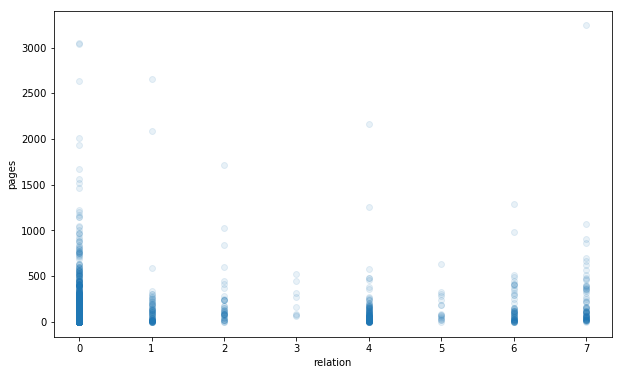

In [51]:
plt.figure(figsize = (10, 6))
plt.plot(data['relation'], data['pages'], 'o', alpha = 0.1)
plt.xlabel('relation')
plt.ylabel('pages')
pass

Есть ли зависимость от количества сообществ, в которых состоит пользователь и его текущем семейным положением?
Откинув первый столбец, видно, что особой зависимости нет. 
Малое число помолвленных, потому что помолвка - это не такое частое явление в России, данный статус более актуален для католической церкви.   


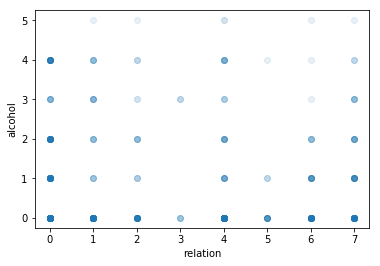

In [44]:
plt.plot(data['relation'], data['alcohol'], 'o', alpha = 0.1)
plt.xlabel('relation')
plt.ylabel('alcohol')
pass

Отношение к алкоголю: 
- 1 — резко негативное; 
- 2 — негативное; 
- 3 — компромиссное; 
- 4 — нейтральное; 
- 5 — положительное;

К алкоголю, в основном, негативное отношение или нейтральное (нужно вычеркнуть первый столбец и последнюю строку). Что не может не радовать. 

Выделение категориальных и числовых столбцов

In [58]:
data['occupation'].unique()

array(['work', 'unknown', 'school', 'university'], dtype=object)

In [59]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['occupation']
['sex', 'age', 'friends', 'postsOnTheWall', 'weeklyPostActivity', 'pages', 'relation', 'alcohol', 'smoking', 'lifeMain', 'peopleMain', 'political', 'followers', 'goodUser']


Заполнение пропущенных данных средними или часто встречающимися значениями опасно, так как имеется огромное количество "неизвестных" данных, поэтому оставим данные без обработки

Текущие данные имеют одну категориальную небинарную колонку

In [61]:
data_describe = data.describe(include = [object])
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(nonbinary_columns)

['occupation']


Проверка, что род занятий принимает более двух возможных значений


In [128]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['occupation_school', 'occupation_university', 'occupation_unknown',
       'occupation_work'],
      dtype='object')


Нормализация некатегориальных столбцов

In [130]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,sex,age,friends,postsOnTheWall,weeklyPostActivity,pages,relation,alcohol,smoking,lifeMain,peopleMain,political,followers,goodUser
count,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03
mean,-5.821801e-16,1.532053e-17,-1.772510e-17,3.565630e-17,-5.071232e-16,-1.353428e-17,4.461503e-16,5.019362e-16,-3.540897e-16,-1.474000e-15,-2.021210e-16,9.520025e-16,8.024384e-17,4.076222e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.917752e+00,-7.780197e-01,-3.971127e-01,-2.752007e-01,-3.211480e-01,-5.671434e-01,-4.941328e-01,-3.517887e-01,-3.476732e-01,-3.098529e-01,-3.537985e-01,-2.654549e-01,-8.999266e-02,-5.752667e-01
25%,-5.399974e-01,-6.772398e-01,-3.045066e-01,-2.704512e-01,-3.063807e-01,-4.744643e-01,-4.941328e-01,-3.517887e-01,-3.476732e-01,-3.098529e-01,-3.537985e-01,-2.654549e-01,-8.607666e-02,-5.752667e-01
50%,-5.399974e-01,-3.245101e-01,-1.990934e-01,-2.409471e-01,-2.594953e-01,-2.928132e-01,-4.941328e-01,-3.517887e-01,-3.476732e-01,-3.098529e-01,-3.537985e-01,-2.654549e-01,-7.334965e-02,-5.752667e-01
75%,-5.399974e-01,2.801694e-01,-2.225534e-02,-1.099057e-01,-1.089649e-01,3.341724e-02,-4.941328e-01,-3.517887e-01,-3.476732e-01,-3.098529e-01,-3.537985e-01,-2.654549e-01,-3.357773e-02,-5.752667e-01
max,1.837757e+00,4.361756e+00,1.926886e+01,1.590241e+01,1.539861e+01,1.144778e+01,2.905885e+00,5.232598e+00,5.182246e+00,5.695812e+00,4.423959e+00,7.130668e+00,3.908571e+01,1.737248e+00


Объединение данных после векторизации и нормализации

In [131]:
data = pd.concat((data_numerical, data_nonbinary), axis = 1)
print(data.shape)
data.describe()

(1616, 18)


,sex,age,friends,postsOnTheWall,weeklyPostActivity,pages,relation,alcohol,smoking,lifeMain,peopleMain,political,followers,goodUser,occupation_school,occupation_university,occupation_unknown,occupation_work
count,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1.616000e+03,1616.000000,1616.000000,1616.000000,1616.000000
mean,-5.821801e-16,1.532053e-17,-1.772510e-17,3.565630e-17,-5.071232e-16,-1.353428e-17,4.461503e-16,5.019362e-16,-3.540897e-16,-1.474000e-15,-2.021210e-16,9.520025e-16,8.024384e-17,4.076222e-15,0.142327,0.178218,0.537129,0.142327
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.349493,0.382814,0.498774,0.349493
min,-2.917752e+00,-7.780197e-01,-3.971127e-01,-2.752007e-01,-3.211480e-01,-5.671434e-01,-4.941328e-01,-3.517887e-01,-3.476732e-01,-3.098529e-01,-3.537985e-01,-2.654549e-01,-8.999266e-02,-5.752667e-01,0.000000,0.000000,0.000000,0.000000
25%,-5.399974e-01,-6.772398e-01,-3.045066e-01,-2.704512e-01,-3.063807e-01,-4.744643e-01,-4.941328e-01,-3.517887e-01,-3.476732e-01,-3.098529e-01,-3.537985e-01,-2.654549e-01,-8.607666e-02,-5.752667e-01,0.000000,0.000000,0.000000,0.000000
50%,-5.399974e-01,-3.245101e-01,-1.990934e-01,-2.409471e-01,-2.594953e-01,-2.928132e-01,-4.941328e-01,-3.517887e-01,-3.476732e-01,-3.098529e-01,-3.537985e-01,-2.654549e-01,-7.334965e-02,-5.752667e-01,0.000000,0.000000,1.000000,0.000000
75%,-5.399974e-01,2.801694e-01,-2.225534e-02,-1.099057e-01,-1.089649e-01,3.341724e-02,-4.941328e-01,-3.517887e-01,-3.476732e-01,-3.098529e-01,-3.537985e-01,-2.654549e-01,-3.357773e-02,-5.752667e-01,0.000000,0.000000,1.000000,0.000000
max,1.837757e+00,4.361756e+00,1.926886e+01,1.590241e+01,1.539861e+01,1.144778e+01,2.905885e+00,5.232598e+00,5.182246e+00,5.695812e+00,4.423959e+00,7.130668e+00,3.908571e+01,1.737248e+00,1.000000,1.000000,1.000000,1.000000


Выброс столбца "является ли пользователем участником сообщества"

In [132]:
X = data.drop(('goodUser'), axis = 1) 
y = data['goodUser']
feature_names = X.columns

In [81]:
print(X.shape)
print(y.shape)
N, d = X.shape

(1616, 17)
(1616,)


Разделение данных на тренировочные и тестовые (20/80)

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1292 324


In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
y_test_encoded = lab_enc.fit_transform(y_test)

Поиск лучшего параметра для алгоритма KNN (варьируемый параметр - количество соседей, остальные по-умолчанию)

In [141]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train_encoded)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.243808049536 15


In [142]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train_encoded)

err_train = np.mean(y_train_encoded != knn.predict(X_train))
err_test  = np.mean(y_test_encoded  != knn.predict(X_test))

print(err_train, err_test)

0.227554179567 0.246913580247


KNN показал довольно неплохие результаты на 15 соседях: ~25% ошибки.
Запуск алгоритма случайного леса для сравнения

In [146]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train_encoded)

err_train = np.mean(y_train_encoded != rf.predict(X_train))
err_test  = np.mean(y_test_encoded  != rf.predict(X_test))
print(err_train, err_test)

0.0 0.216049382716


Отличный результат. В первом же запуске уменьшение ошибки ~3%
Нахождение наилучшего параметра для алгоритма случайный лес

In [150]:
from sklearn.model_selection import GridSearchCV
ne = [95, 110, 115, 120, 125, 130]
rf = ensemble.RandomForestClassifier()
grid = GridSearchCV(rf, param_grid = {'n_estimators': ne}, cv=10)
grid.fit(X_train, y_train_encoded)

best_cv_err = 1 - grid.best_score_
best_n_estimators = grid.best_estimator_.n_estimators
print(best_cv_err, best_n_estimators)

0.235294117647 110


In [148]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=best_n_estimators, random_state=11)
rf.fit(X_train, y_train_encoded)

err_train = np.mean(y_train_encoded != rf.predict(X_train))
err_test  = np.mean(y_test_encoded  != rf.predict(X_test))
print(err_train, err_test)

0.0 0.222222222222


Перебор различных параметров не дал ощутимых результатов (стало немного хуже)

В данном исследовании удалось снизить ошибку до 21%.
Далее, необходимо провести обучение с помощью других алгоритмов, это может улучшить результат. 
Также, снизить ошибку возможно, оставив в выборке данные людей, которые не указали свой возраст, это существенно повысит размер обучающей и тестовой выборок (почти в 4 раза)
Еще один варинат - это избавиться от большого количества столбцов с информацией об отношении к курению, алкоголю, политике и т.п. В большинстве своем, пользователи выставляют настройки приватности таким образом, что эту информацию могут видеть только пользователи находящиеся в "друзьях"

К сожалению, автор не успел проверить результаты своего исследования на реальных данных и узнать удалось ли понизить расходы на рекламу, потому что часто ходит по самому краю дедлайнов =(